# Exploratory Data Analysis:Framingham Heart Study

### Data Dictionary

+ sex : the gender of the observations. The variable is a binary named “male” in the dataset.

+ age : Age at the time of medical examination in years.

+ education : A categorical variable of the participants education, with the levels: Some high school (1), high school/GED (2), some college/vocational school (3), college (4)

+ currentSmoker: Current cigarette smoking at the time of examinations

+ cigsPerDay: Number of cigarettes smoked each day

+ BPmeds: Use of Anti-hypertensive medication at exam

+ prevalentStroke: Prevalent Stroke (0 = free of disease)

+ prevalentHyp: Prevalent Hypertensive. Subject was defined as hypertensive if treated

+ diabetes: Diabetic according to criteria of first exam treated

+ totChol: Total cholesterol (mg/dL)

+ sysBP: Systolic Blood Pressure (mmHg)

+ diaBP: Diastolic blood pressure (mmHg)

+ BMI: Body Mass Index, weight (kg)/height (m)^2

+ heartRate: Heart rate (beats/minute)

+ glucose: Blood glucose level (mg/dL)

+ TenYearCHD : The 10 year risk of coronary heart disease(CHD).



In [10]:
#Importing neccesary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix





In [2]:
df= pd.read_csv(r'C:\Users\Admin\Documents\framingham.csv')

In [3]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [4]:
#Using describe to understand data through summary statistics
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
#Using info to understand data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


#**Data Cleaning:**

In [6]:
#checking for null values
df.isnull().sum()


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
#dropping the na values as the number of missing values is relatively small compared to the total number of observations and dropping them won't significantly affect the analysis,
df = df.dropna()

In [8]:
# Convert data types
df['education'] = df['education'].astype('Int64')  # Convert to nullable integer type

# Perform one-hot encoding for 'education' column
df = pd.get_dummies(df, columns=['education'], prefix='education')

#**High Level Aggregation and Summary**

<Axes: >

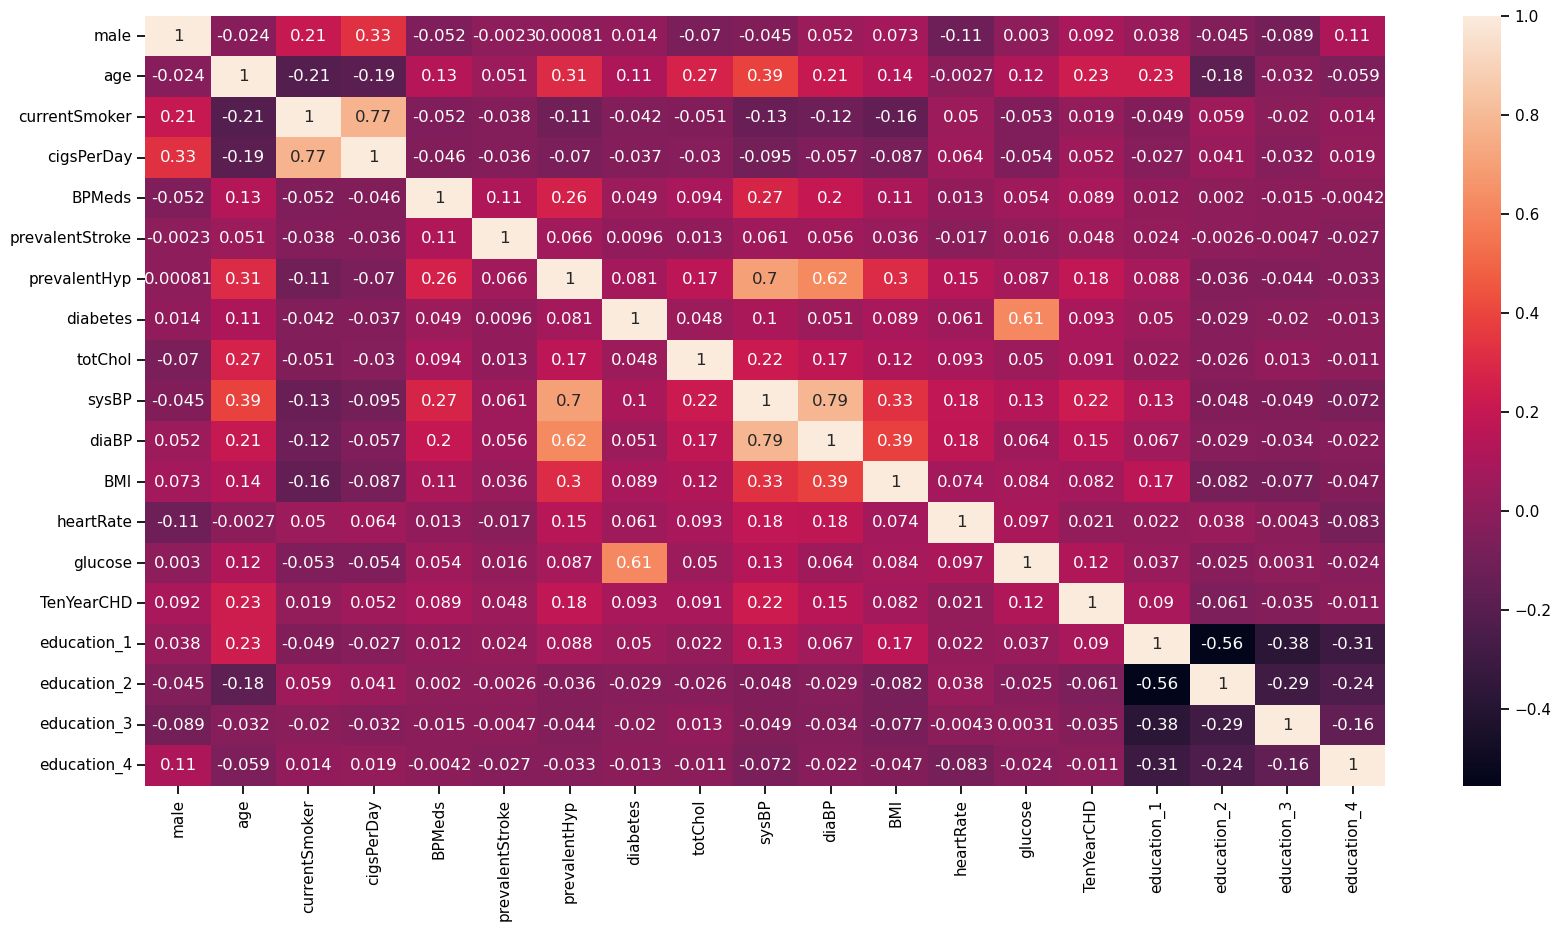

In [9]:
#Creating Heatmap of correlation between variables
sns.set_context('notebook')
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

### Obeservations:-

##### Positive Associations with CHD Risk:
1.Age: Higher age is positively correlated with an increased risk of CHD, indicating that older individuals tend to have a higher risk.

2.Systolic Blood Pressure (sysBP): Elevated systolic blood pressure shows a positive correlation with CHD risk, suggesting that individuals with higher blood pressure levels may be at greater risk.

3.Cigarettes per Day (cigsPerDay): Smoking behavior, represented by the number of cigarettes smoked per day, exhibits a positive association with CHD risk, indicating that smokers may face a higher risk.

4.Current Smoker Status (currentSmoker): Being a current smoker is positively associated with CHD risk, highlighting the detrimental impact of smoking on cardiovascular health.

5.Glucose Levels: Higher glucose levels are positively correlated with an increased risk of CHD, indicating a potential link between elevated blood sugar levels and cardiovascular risk.

##### Negative Associations with CHD Risk:
1.Higher Education Levels: Individuals with higher education levels demonstrate negative correlations with factors such as age, systolic blood pressure, prevalent hypertension, and body mass index, suggesting that higher education may confer some protective effect against CHD risk

##### Factors with Limited Correlation to CHD Risk:
1.Blood Pressure Medication (BPMeds): The use of blood pressure medication shows limited correlation with the risk of CHD in this dataset, indicating that medication alone may not significantly impact CHD risk.

2.History of Prevalent Stroke (prevalentStroke): A prior history of stroke exhibits limited correlation with CHD risk, suggesting that the relationship between stroke and CHD risk may not be pronounced in this context.

##### Overall Correlations:
The overall correlations with Ten-Year CHD are relatively weak, indicating that multiple factors may contribute to the risk of coronary heart disease. This underscores the complex interplay of various risk factors in determining an individual's susceptibility to CHD.



In [11]:
# Define features (X) and target variable (y)
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

# Splitting the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from scipy.stats import zscore

# Calculate z-scores for each column
X_train_scaled = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)

In [13]:
# Creating and training the logistic regression model
model = LogisticRegression()  
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [14]:
# Making predictions
y_pred = model.predict(X_test_scaled)

In [15]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8415300546448088


In [16]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       610
           1       0.69      0.09      0.16       122

    accuracy                           0.84       732
   macro avg       0.77      0.54      0.54       732
weighted avg       0.82      0.84      0.79       732



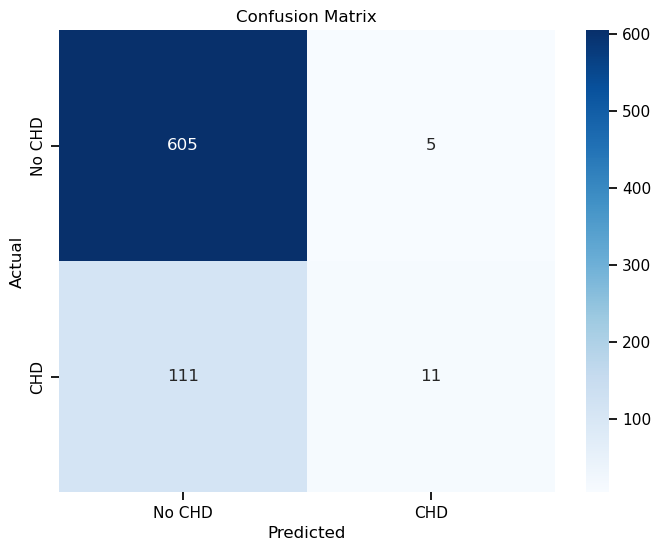

In [19]:
def plot_confusion_matrix(y_true, y_pred, labels):
    """
    Plot confusion matrix using heatmap.
    
    Args:
    - y_true: true labels
    - y_pred: predicted labels
    - labels: list of class labels
    """
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Create DataFrame for confusion matrix
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, cmap="Blues", fmt='g')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, labels=['No CHD', 'CHD'])

### Observations:
1.The model performs much better in identifying individuals without coronary heart disease (Non-CHD) compared to those with coronary heart disease (CHD).

2.There is a significant imbalance in the dataset, with a large majority of individuals being classified as Non-CHD. This imbalance affects the model's ability to effectively predict the minority class (CHD).

3.The model may benefit from techniques such as resampling, adjusting class weights, or using different evaluation metrics to account for class imbalance and improve performance.